<a href="https://colab.research.google.com/github/haynesmatt/Carrotive/blob/main/PyTorch_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from __future__ import print_function

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
torch.set_printoptions(linewidth = 120)

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [3]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()]),
    
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
print(len(training_data))

60000


In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [ ]:

print(training_data.targets)



tensor([9, 0, 0,  ..., 3, 0, 5])


In [ ]:
sample = next(iter(training_data))
sample_image, sample_label = sample
# image size
print(sample_image.shape)

torch.Size([1, 28, 28])


label: 9


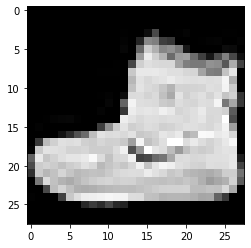

In [ ]:
plt.imshow(sample_image.squeeze(), cmap='gray')
print('label:', sample_label)

In [ ]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

# Train CNN

def TrainCNN(epochs, train_dataloader, test_dataloader, model, loss_fn, optimizer):



  batches = 0
  train_losses = list()
  val_losses = list()
  val_acces = list()
  batch_lst = list()
  val_loss = 0

  for epoch in range(1,epochs+1):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(train_dataloader):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data

          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = model(inputs)
          loss = loss_fn(outputs, labels)
          loss.backward() 
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 100 == 99:    # print every 2000 mini-batches

              model.eval()
            
              correct = 0


              for j, val_data in enumerate(test_dataloader):
                  val_X, val_y = val_data


                  outputs = model(val_X)

                  v_loss = loss_fn(outputs, val_y)
                  val_loss += v_loss.item()

                  preds = outputs.data.max(1, keepdim=True)[1]

                  correct += preds.eq(val_y.view_as(preds)).cpu().sum().item()

              log = f"epoch: {epoch} {i+1} " \
                  f"train_loss: {running_loss / 100:.3f} " \
                  f"val_loss: {val_loss / 100:.3f} " \
                  f"Val Acc: {correct/len(test_dataloader.dataset):.3f}"


              train_losses.append(running_loss / 100)
              val_losses.append(val_loss / 100)
              val_acces.append(correct/len(test_dataloader.dataset))
              batches += 100
              batch_lst.append(batches)

              val_loss = 0

              print(log)

              running_loss = 0.0

              model.train()
              writer.flush()

              


  print('Finished Training')
  writer.close()

  plt.figure(figsize=(16,6))
  plt.plot(batch_lst, train_losses, '-o', label='Training loss')
  plt.plot(batch_lst, val_losses, '-o', label='Testing loss')
  plt.legend()
  plt.title('Learning curves')
  plt.xlabel('Batches')
  plt.ylabel('Loss')
  plt.xticks(batch_lst,rotation = 90)
  plt.tight_layout()


  plt.show()




SyntaxError: ignored

In [ ]:
# Define model
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

epoch: 1 100 train_loss: 0.834 val_loss: 0.929 Val Acc: 0.783
epoch: 1 200 train_loss: 0.547 val_loss: 0.843 Val Acc: 0.809
epoch: 1 300 train_loss: 0.501 val_loss: 0.843 Val Acc: 0.807
epoch: 1 400 train_loss: 0.459 val_loss: 0.753 Val Acc: 0.825
epoch: 1 500 train_loss: 0.449 val_loss: 0.769 Val Acc: 0.825
epoch: 1 600 train_loss: 0.428 val_loss: 0.672 Val Acc: 0.848
epoch: 1 700 train_loss: 0.403 val_loss: 0.729 Val Acc: 0.834
epoch: 1 800 train_loss: 0.414 val_loss: 0.640 Val Acc: 0.856
epoch: 1 900 train_loss: 0.408 val_loss: 0.670 Val Acc: 0.844
epoch: 2 100 train_loss: 0.382 val_loss: 0.616 Val Acc: 0.859
epoch: 2 200 train_loss: 0.368 val_loss: 0.639 Val Acc: 0.853
epoch: 2 300 train_loss: 0.369 val_loss: 0.641 Val Acc: 0.855
epoch: 2 400 train_loss: 0.369 val_loss: 0.620 Val Acc: 0.860
epoch: 2 500 train_loss: 0.352 val_loss: 0.656 Val Acc: 0.853
epoch: 2 600 train_loss: 0.351 val_loss: 0.604 Val Acc: 0.863
epoch: 2 700 train_loss: 0.341 val_loss: 0.670 Val Acc: 0.845
epoch: 2

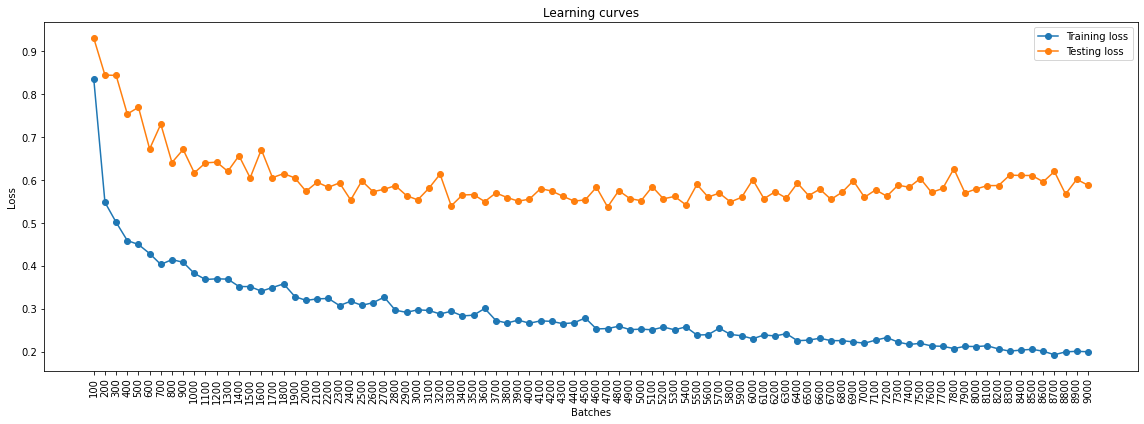

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
epochs = 10

TrainCNN(epochs, train_dataloader, test_dataloader, model, loss_fn, optimizer)

In [ ]:
def PredictModel(model):
  classes = [
      "T-shirt/top",
      "Trouser",
      "Pullover",
      "Dress",
      "Coat",
      "Sandal",
      "Shirt",
      "Sneaker",
      "Bag",
      "Ankle boot",
  ]

  model.eval()
  x, y = test_data[0][0], test_data[0][1]
  with torch.no_grad():
      pred = model(x)
      predicted, actual = classes[pred[0].argmax(0)], classes[y]
      print(f'Predicted: "{predicted}", Actual: "{actual}"')

In [ ]:

# Output size formula
# n x n input
# f x f filter/kernel
# p is padding
# s is stride

# then output size will be (n - f + 2p)/s + 1
# Get cpu or gpu device for training.

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


class FMNISTCNN(nn.Module):
    def __init__(self):
        super(FMNISTCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels=6, kernel_size = 5)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features= 120)
        self.fc2 = nn.Linear(in_features = 120, out_features = 60)
        self.out = nn.Linear(in_features= 60, out_features = 10)


    def forward(self, tensor):
        
          # hidden layer 1
          tensor = self.conv1(tensor)
          tensor = F.relu(tensor)
          tensor = F.max_pool2d(tensor, kernel_size = 2, stride= 2)
        
          # hidden layer 2
        
          tensor = self.conv2(tensor)
          tensor = F.relu(tensor)
          tensor = F.max_pool2d(tensor, kernel_size = 2, stride = 2)
        
          #hidden layer 3
        
          tensor = tensor.reshape(-1, 12 * 4* 4)
          tensor = self.fc1(tensor)
          tensor = F.relu(tensor)
        
          #hidden layer 4
        
          tensor = self.fc2(tensor)
          tensor = F.relu(tensor)
        
          #output layer
        
          tensor = self.out(tensor)
        
          return tensor
    


Using cpu device


In [ ]:
modelCNN = FMNISTCNN().to(device)
print(modelCNN)

FMNISTCNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


epoch: 1 100 train_loss: 0.849 val_loss: 1.286 Val Acc: 0.681
epoch: 1 200 train_loss: 0.763 val_loss: 1.210 Val Acc: 0.712
epoch: 1 300 train_loss: 0.708 val_loss: 1.067 Val Acc: 0.747
epoch: 1 400 train_loss: 0.657 val_loss: 1.047 Val Acc: 0.756
epoch: 1 500 train_loss: 0.622 val_loss: 0.964 Val Acc: 0.768
epoch: 1 600 train_loss: 0.593 val_loss: 0.954 Val Acc: 0.768
epoch: 1 700 train_loss: 0.573 val_loss: 0.992 Val Acc: 0.758
epoch: 1 800 train_loss: 0.563 val_loss: 0.886 Val Acc: 0.786
epoch: 1 900 train_loss: 0.563 val_loss: 0.885 Val Acc: 0.788
epoch: 2 100 train_loss: 0.517 val_loss: 0.844 Val Acc: 0.794
epoch: 2 200 train_loss: 0.522 val_loss: 0.834 Val Acc: 0.802
epoch: 2 300 train_loss: 0.512 val_loss: 0.824 Val Acc: 0.805
epoch: 2 400 train_loss: 0.502 val_loss: 0.846 Val Acc: 0.802
epoch: 2 500 train_loss: 0.491 val_loss: 0.785 Val Acc: 0.814
epoch: 2 600 train_loss: 0.470 val_loss: 0.753 Val Acc: 0.823
epoch: 2 700 train_loss: 0.461 val_loss: 0.841 Val Acc: 0.805
epoch: 2

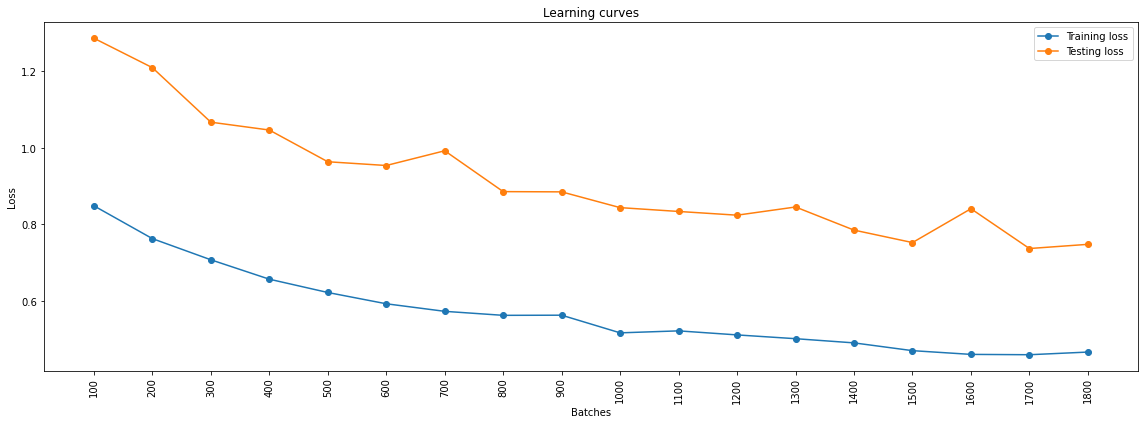

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelCNN.parameters(), lr=1e-3)
epochs = 2

TrainCNN(epochs, train_dataloader, test_dataloader, modelCNN, loss_fn, optimizer)

In [1]:



class CNNNet(nn.Module):
    def __init__(self):
        super(CNNNet, self).__init__()

        # Input 1 channel(b/c black and white) with 32 filters each with kernel_size=3 (3*3)
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)

        self.batch_norm1 = nn.BatchNorm2d(32)
        self.batch_norm2 = nn.BatchNorm2d(64)
        self.batch_norm3 = nn.BatchNorm2d(128)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.dropout25 = nn.Dropout2d(p=0.25)

        # Fully connected layer
        self.fc1 = nn.Linear(128*3*3,32)
        self.fc2 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.batch_norm1(self.conv1(x))))
        x = self.dropout25(x)
        x = self.pool(F.relu(self.batch_norm2(self.conv2(x))))
        x = self.dropout25(x)
        x = self.pool(F.relu(self.batch_norm3(self.conv3(x))))
        x = self.dropout25(x)

        x = x.view(x.size(0),-1)
        x = self.fc1(x)
        x = self.fc2(x)

        return x

NameError: ignored

In [ ]:
model_2_CNN = CNNNet().to(device)
print(model_2_CNN)

CNNNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch_norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout25): Dropout2d(p=0.25, inplace=False)
  (fc1): Linear(in_features=1152, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=10, bias=True)
)


epoch: 1 100 train_loss: 0.537 val_loss: 0.762 Val Acc: 0.821
epoch: 1 200 train_loss: 0.498 val_loss: 0.675 Val Acc: 0.845
epoch: 1 300 train_loss: 0.448 val_loss: 0.633 Val Acc: 0.852
epoch: 1 400 train_loss: 0.407 val_loss: 0.643 Val Acc: 0.855
epoch: 1 500 train_loss: 0.407 val_loss: 0.635 Val Acc: 0.856
epoch: 1 600 train_loss: 0.385 val_loss: 0.551 Val Acc: 0.874
epoch: 1 700 train_loss: 0.367 val_loss: 0.555 Val Acc: 0.869
epoch: 1 800 train_loss: 0.371 val_loss: 0.535 Val Acc: 0.874
epoch: 1 900 train_loss: 0.365 val_loss: 0.530 Val Acc: 0.876
epoch: 2 100 train_loss: 0.339 val_loss: 0.525 Val Acc: 0.882
epoch: 2 200 train_loss: 0.340 val_loss: 0.521 Val Acc: 0.881
epoch: 2 300 train_loss: 0.335 val_loss: 0.537 Val Acc: 0.876
epoch: 2 400 train_loss: 0.319 val_loss: 0.525 Val Acc: 0.880
epoch: 2 500 train_loss: 0.327 val_loss: 0.550 Val Acc: 0.873
epoch: 2 600 train_loss: 0.318 val_loss: 0.477 Val Acc: 0.890
epoch: 2 700 train_loss: 0.312 val_loss: 0.481 Val Acc: 0.889
epoch: 2

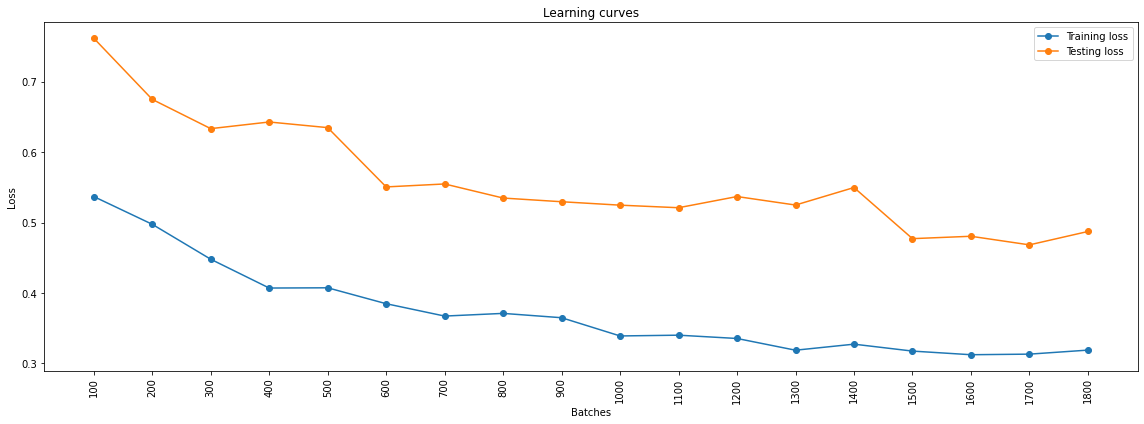

In [ ]:
# YOUR CODE HERE

loss_fn = 
optimizer = 
epochs = 

TrainCNN()

# YOUR CODE ENDS HERE